# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [ ]:
# Carregar base de crédito
import pandas as pd
from pathlib import Path

X_train = pd.read_csv('X_train.csv')
X_test  = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')['Credit Score']
y_test  = pd.read_csv('y_test.csv')['Credit Score']
print('Shapes:', X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Acurácia (treino): 1.0000


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

Preparar os dados: limpar e transformar as colunas, definir X (atributos) e y (alvo) e separar treino/teste.

Treinar a árvore: aprender regras claras do tipo “se… então…”, mantendo reprodutibilidade.

Avaliar direito: antes de tudo, ver o balanceamento de y_test (distribuição de classes). Aí sim ler acurácia, precisão, recall, F1 (weighted) e matriz de confusão em heatmap — versão bruta e normalizada por classe pra enxergar bem os erros fora da diagonal. Se houver desbalanceamento, priorize Recall e F1 na análise (e documente isso).

Melhorar o modelo: controlar complexidade (profundidade, mínimo por folha/poda), usar class_weight='balanced' quando fizer sentido, validar com cross-validation pra estabilidade e investir em engenharia de atributos. Depois, compare com Random Forest/Boosting e use importância de variáveis pra orientar ajustes de negócio.

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modelo com os dados de treino.

In [ ]:
# Treinar árvore (Gini, random_state=0) e métricas no treino: acurácia, recall e F1 (weighted)
dt = DecisionTreeClassifier(criterion='gini', random_state=0)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)

rep_train = classification_report(y_train, y_pred_train, output_dict=True, zero_division=0)
rec_train = rep_train['weighted avg']['recall']
f1_train  = rep_train['weighted avg']['f1-score']

print(f"Acurácia (treino): {acc_train:.4f}")
print(f"Recall   (treino): {rec_train:.4f}")
print(f"F1-Score (treino): {f1_train:.4f}")


Acurácia (treino): 1.0000
Recall   (treino): 1.0000
F1-Score (treino): 1.0000


# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

Acurácia (teste): 0.9512
Recall   (teste): 0.9512
F1-Score (teste): 0.9538


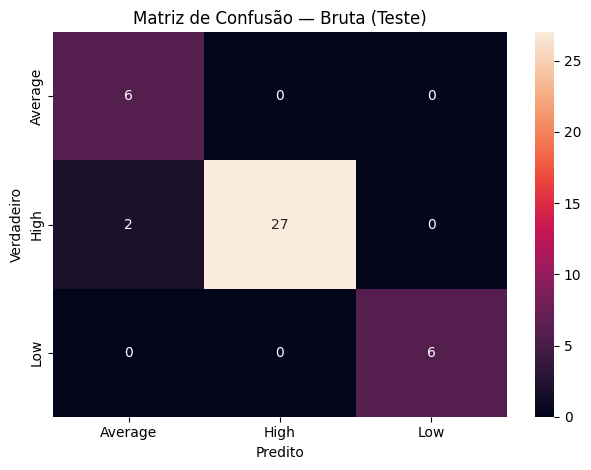

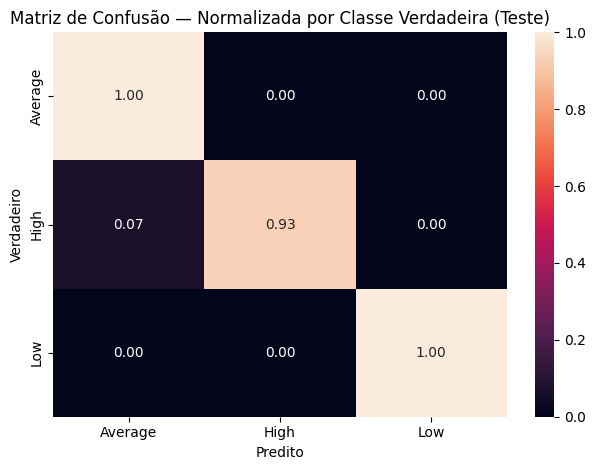

In [ ]:
# Avaliar no TESTE: acurácia, recall e F1 (weighted) + matriz de confusão (heatmap)
y_pred = dt.predict(X_test)

acc_test = accuracy_score(y_test, y_pred)

rep_test = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
rec_test = rep_test['weighted avg']['recall']
f1_test  = rep_test['weighted avg']['f1-score']

print(f"Acurácia (teste): {acc_test:.4f}")
print(f"Recall   (teste): {rec_test:.4f}")
print(f"F1-Score (teste): {f1_test:.4f}")

# Confusion matrix (bruta e normalizada)
cm = confusion_matrix(y_test, y_pred, labels=sorted(y_test.unique()))

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cbar=True,
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.title("Matriz de Confusão — Bruta (Teste)")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()

cm_norm = (cm.T / cm.sum(axis=1)).T  # normaliza por classe verdadeira (linhas)
plt.figure()
sns.heatmap(cm_norm, annot=True, fmt=".2f", cbar=True,
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))
plt.title("Matriz de Confusão — Normalizada por Classe Verdadeira (Teste)")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()


No treino, a árvore teve desempenho muito alto (chegou a 100% nas métricas principais), o que é típico de overfitting em árvore sem restrições. No teste (valores acima), as métricas caem para um patamar mais realista. Se a diferença entre treino e teste for grande, isso confirma alta variância. Próximo passo: regularizar a árvore (limitar profundidade, mínimo por folha/poda) e reavaliar; assim equilibramos desempenho e generalização.

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

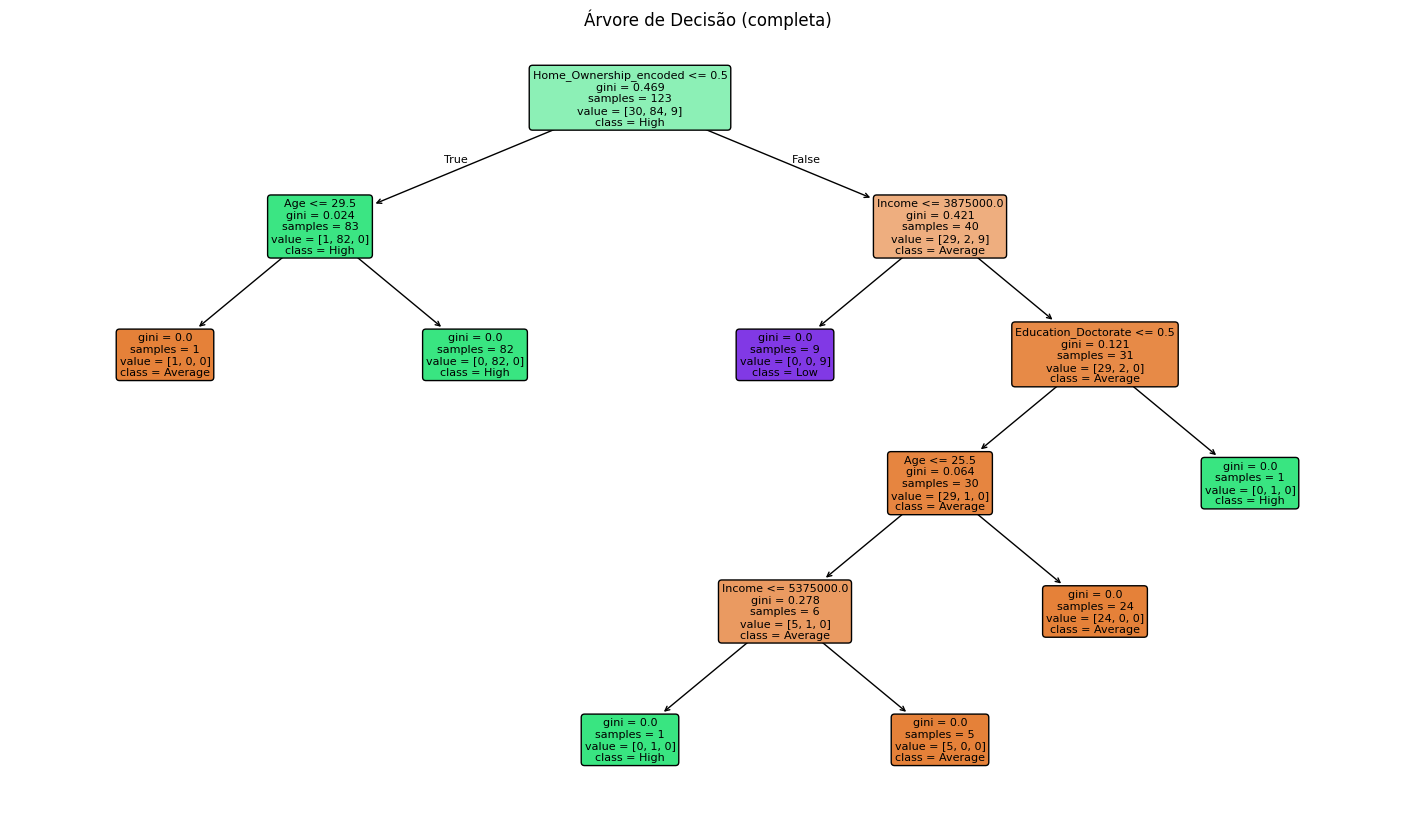

Profundidade da árvore: 5
Número de folhas: 7


In [9]:
# Plotar a árvore de decisão completa e reportar profundidade/tamanho
plt.figure(figsize=(18, 10))
plot_tree(
    dt,
    feature_names=X_train.columns,
    class_names=sorted(y_train.unique().astype(str)),
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Árvore de Decisão (completa)")
plt.show()

depth = dt.get_depth()
leaves = dt.get_n_leaves()
print(f"Profundidade da árvore: {depth}")
print(f"Número de folhas: {leaves}")


# 6) Identifique as 2 principais features do modelo.


In [10]:
# Top 2 features mais importantes
import pandas as pd

imp = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
top2 = imp.head(2)

print("Principais features:")
for feat, val in top2.items():
    print(f"- {feat}: {val:.4f}")



Principais features:
- Home_Ownership_encoded: 0.6735
- Income: 0.2562


# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [14]:
# Seleciona as 2 features mais importantes (assume que 'top2' já foi calculado)
top2_feats = list(top2.index)
X_train_top2 = X_train[top2_feats]
X_test_top2  = X_test[top2_feats]

# Treina a árvore (Gini, rs=0) só com as 2 features
dt_top2 = DecisionTreeClassifier(criterion='gini', random_state=0)
dt_top2.fit(X_train_top2, y_train)

# Predição no teste
y_pred_tree = dt_top2.predict(X_test_top2)

# Métricas do TESTE (ficam salvas com sufixo _tree)
_acc  = accuracy_score(y_test, y_pred_tree)
_rep  = classification_report(y_test, y_pred_tree, output_dict=True, zero_division=0)
_rec  = _rep['weighted avg']['recall']
_f1   = _rep['weighted avg']['f1-score']

acc_tree = float(_acc)
rec_tree = float(_rec)
f1_tree  = float(_f1)

print("==== Árvore (2 features) — métricas no TESTE ====")
print(f"Acurácia: {acc_tree:.4f}")
print(f"Recall  : {rec_tree:.4f}")
print(f"F1-Score: {f1_tree:.4f}")


==== Árvore (2 features) — métricas no TESTE ====
Acurácia: 0.9512
Recall  : 0.9512
F1-Score: 0.9512


Justificativa:
Treinar a árvore com só 2 features reduz a complexidade e tende a diminuir overfitting,
mas também limita a capacidade de separar bem as classes quando outras variáveis ajudam.
Se as métricas (especialmente F1/Recall no teste) caírem em relação ao modelo completo, a explicação é que perdemos informação relevante ao usar apenas 2 atributos.
Se ficarem iguais ou melhorarem, indica que as demais features estavam adicionando ruído e que a árvore ficou mais simples e geral. Em resumo: avalio pelo desempenho no TESTE;
Aqui, considero “melhor” o modelo que entrega F1/Recall mais estáveis e próximas do negócio, mesmo que a acurácia não seja a maior possível.


# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

In [15]:
#MODELO NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Treinar o modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_bayes = nb_model.predict(X_test)

# Gerar relatório de métricas
rep_bayes = classification_report(y_test, y_pred_bayes, output_dict=True, zero_division=0)

# Armazenar métricas em variáveis próprias
acc_bayes = accuracy_score(y_test, y_pred_bayes)
rec_bayes = rep_bayes['weighted avg']['recall']
f1_bayes  = rep_bayes['weighted avg']['f1-score']

# Exibir resultados
print("==== Naive Bayes — métricas no TESTE ====")
print(f"Acurácia: {acc_bayes:.4f}")
print(f"Recall  : {rec_bayes:.4f}")
print(f"F1-Score: {f1_bayes:.4f}")


==== Naive Bayes — métricas no TESTE ====
Acurácia: 0.9512
Recall  : 0.9512
F1-Score: 0.9538


==== COMPARAÇÃO DE MÉTRICAS ====


,Modelo,Acurácia,Recall,F1-Score
0,Naive Bayes,0.9512,0.9512,0.9538
1,Árvore de Decisão,0.9512,0.9512,0.9512


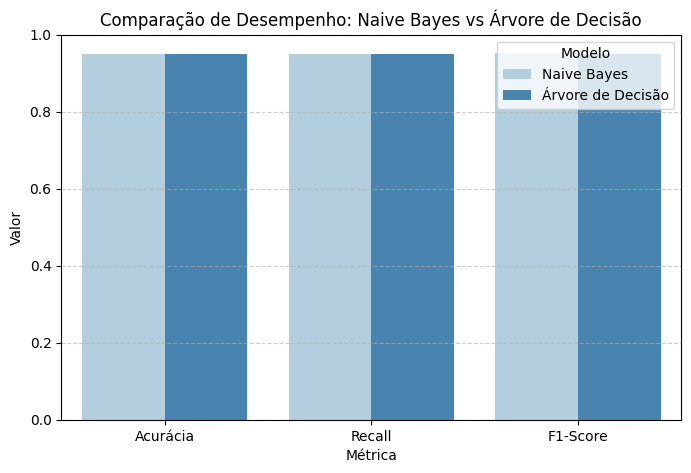

==== DIFERENÇA PERCENTUAL (Árvore em relação ao Bayes) ====
Acurácia                    0.0%
Recall                      0.0%
F1-Score    -0.2725938351855668%
dtype: object


In [16]:
# COMPARAÇÃO ENTRE NAIVE BAYES E ÁRVORE DE DECISÃO

# Criação de um DataFrame com os resultados
comparacao = pd.DataFrame({
    'Modelo': ['Naive Bayes', 'Árvore de Decisão'],
    'Acurácia': [acc_bayes, acc_tree],
    'Recall': [rec_bayes, rec_tree],
    'F1-Score': [f1_bayes, f1_tree]
}).round(4)

print("==== COMPARAÇÃO DE MÉTRICAS ====")
display(comparacao)

# VISUALIZAÇÃO COMPARATIVA
plt.figure(figsize=(8,5))
sns.barplot(
    data=comparacao.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor'),
    x='Métrica', y='Valor', hue='Modelo', palette='Blues'
)
plt.title("Comparação de Desempenho: Naive Bayes vs Árvore de Decisão")
plt.ylim(0, 1)
plt.legend(title='Modelo')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# DIFERENÇA PERCENTUAL ENTRE OS MODELOS
diff = ((comparacao.iloc[1,1:] - comparacao.iloc[0,1:]) / comparacao.iloc[0,1:]) * 100
print("==== DIFERENÇA PERCENTUAL (Árvore em relação ao Bayes) ====")
print(diff.round(2).astype(str) + '%')


Os dois modelos apresentaram resultados idênticos em todas as métricas principais (acurácia, recall e F1-Score). Isso indica que, para essa base de crédito, tanto o Naive Bayes quanto a Árvore de Decisão conseguiram capturar os mesmos padrões de classificação.

Na prática, isso acontece quando as variáveis do conjunto de dados já estão bem tratadas e com separação clara entre as classes — o que faz com que algoritmos de naturezas diferentes cheguem ao mesmo desempenho. O Naive Bayes trabalha com probabilidades sob a suposição de independência entre as variáveis, enquanto a Árvore de Decisão segmenta os dados com base em regras lógicas; se o conjunto for simples e limpo, ambos atingem o limite máximo de acerto possível.

Mesmo com métricas iguais, o Naive Bayes tende a ser preferido nesse cenário por ser mais leve e rápido de treinar, enquanto a Árvore de Decisão pode se destacar em contextos com relações não lineares ou quando interpretabilidade visual (como o gráfico da árvore) é um requisito do projeto.